In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("Final_Dataset.csv").iloc[:,1:]
print(df)

def transform_function(x):
    return max(x-20,0)# Example transformation: doubling the value

def transform_function_2(x):
    return max(16.5-x,0)# Example transformation: doubling the value

# Create the new column using the assign() function
df = df.assign(Cooling_req=df['Weighted_Average_Temperature'].apply(transform_function))
df = df.assign(Heating_req=df['Weighted_Average_Temperature'].apply(transform_function_2))

# Print the DataFrame with the new column
print(df.columns)

            Date  Electricity_price  Exchange  CO2_spot  EU_spark_spread  \
0     2011-01-02          43.161250   1.33795    14.660       -23.613702   
1     2011-01-03          59.859583   1.33540    14.660        -6.788102   
2     2011-01-04          57.637917   1.33035    14.315        -4.858477   
3     2011-01-05          55.076250   1.31515    13.970        -5.849486   
4     2011-01-06          47.282083   1.30015    13.970       -13.583885   
...          ...                ...       ...       ...              ...   
4628  2023-09-04         108.445417   1.07960    84.000        32.398771   
4629  2023-09-05         103.542083   1.07220    84.000        28.306946   
4630  2023-09-06         105.617917   1.07275    84.000        33.918564   
4631  2023-09-07         100.985833   1.07010    84.000        30.772637   
4632  2023-09-08         108.227083   1.07005    83.045        30.899473   

      EU_clean_spark_spread  Oil_Price  Oil_Volume  Sun_energy  Wind_energy  \
0       

In [31]:
"""print(df.iloc[:,1:].corr())"""
string="EU_clean_spark_spread"
corr_df=pd.DataFrame()
corr_df["Gas"]=df["Gas_Price_EUR"].pct_change().values
corr_df["Var2"]=df[string].pct_change().values/df[string].ewm(span=30, adjust=False).mean().pct_change().values

corr_df=corr_df.dropna()
print(corr_df)


ema_span = [10,30,60,100]
for ema in ema_span:
    column="EMA"
    corr_df[f'{column}_lag{ema}'] = corr_df['Var2'].ewm(span=ema, adjust=False).mean()


lags = [1,2,3,4,5,6,7,8,9,10,20,31,60,100,120]  # Add lag variables for the previous 3 time steps

# Add lag variables to the DataFrame
for lag in lags:
    for column in ['Var2']:
        corr_df[f'{column}_lag{lag}'] = corr_df[column].shift(lag)
corr_df=corr_df.dropna()


print(corr_df)


           Gas       Var2
1    -0.001906  15.500000
2    -0.062287   4.574377
3    -0.025132  -2.871591
4    -0.000981 -46.664021
5    -0.010666  10.026447
...        ...        ...
4628 -0.041401 -14.998521
4629 -0.010671  -3.756052
4630 -0.046996   3.987124
4631 -0.020728  -2.575337
4632  0.101326   0.348915

[4632 rows x 2 columns]


'ema_span = [10,30,60,100]\nfor ema in ema_span:\n    column="EMA"\n    corr_df[f\'{column}_lag{ema}\'] = corr_df[\'Var2\'].ewm(span=ema, adjust=False).mean()\n\n\nlags = [1,2,3,4,5,6,7,8,9,10,20,31,60,100,120]  # Add lag variables for the previous 3 time steps\n\n# Add lag variables to the DataFrame\nfor lag in lags:\n    for column in [\'Var2\']:\n        corr_df[f\'{column}_lag{lag}\'] = corr_df[column].shift(lag)\ncorr_df=corr_df.dropna()\n\n\nprint(corr_df.corr())\n'

In [32]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 30  # Maximum lag to test
test_result = grangercausalitytests(corr_df, max_lag, verbose=True)




C:\Users\Olej0\OneDrive\Dokumenter\TFT_Model\pytorch-forecasting\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0408  , p=0.8398  , df_denom=4628, df_num=1
ssr based chi2 test:   chi2=0.0409  , p=0.8398  , df=1
likelihood ratio test: chi2=0.0409  , p=0.8398  , df=1
parameter F test:         F=0.0408  , p=0.8398  , df_denom=4628, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0348  , p=0.9658  , df_denom=4625, df_num=2
ssr based chi2 test:   chi2=0.0697  , p=0.9657  , df=2
likelihood ratio test: chi2=0.0697  , p=0.9657  , df=2
parameter F test:         F=0.0348  , p=0.9658  , df_denom=4625, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1750  , p=0.3177  , df_denom=4622, df_num=3
ssr based chi2 test:   chi2=3.5303  , p=0.3169  , df=3
likelihood ratio test: chi2=3.5289  , p=0.3170  , df=3
parameter F test:         F=1.1750  , p=0.3177  , df_denom=4622, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.1603  , p=0.

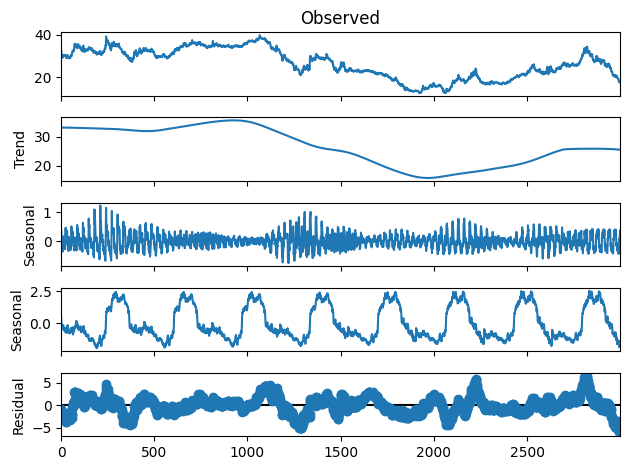

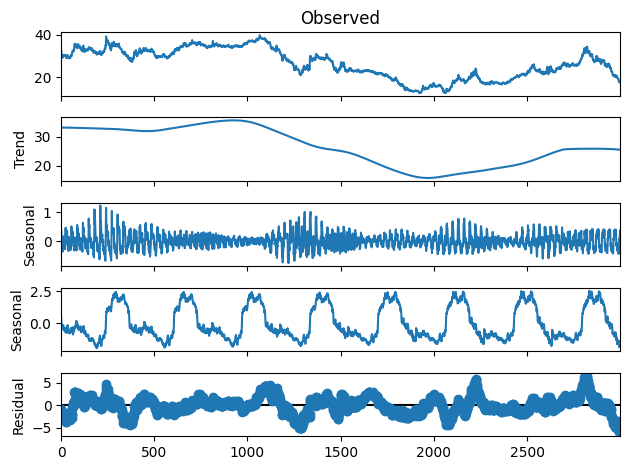

In [35]:
import pandas as pd
import statsmodels.api as sm

string="Electricity_price"
corr_df=pd.DataFrame()
corr_df["Gas"]=df["Gas_Price_EUR"].values
"""corr_df["Var2"]=df[string].values
lags = [1,2,3,4,5,6,7,8,9,10,20,30,32,31,60,100,120,365,366,364]  # Add lag variables for the previous 3 time steps

# Add lag variables to the DataFrame
for lag in lags:
    for column in ['Var2']:
        corr_df[f'{column}_lag{lag}'] = corr_df[column].shift(lag)
corr_df=corr_df.dropna()


# Define the dependent variable (Y) and independent variables (X1, X2)
X = corr_df.iloc[:,1:]
y = corr_df['Gas']

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())"""


from statsmodels.tsa.seasonal import MSTL

stl_kwargs = {"seasonal_deg": 0} 
model = MSTL(corr_df["Gas"].values[0:3000], periods=(365, 31), stl_kwargs=stl_kwargs)
res = model.fit()

seasonal = res.seasonal # contains both seasonal components
trend = res.trend
residual = res.resid


res.plot()


           Date     Value
0    2011-01-02  0.345803
1    2011-01-03  0.370280
2    2011-01-04 -0.003721
3    2011-01-05  0.063568
4    2011-01-06  0.044073
...         ...       ...
2995 2019-03-16  0.057209
2996 2019-03-17  0.024541
2997 2019-03-18  0.096699
2998 2019-03-19  0.199585
2999 2019-03-20  0.361759

[3000 rows x 2 columns]


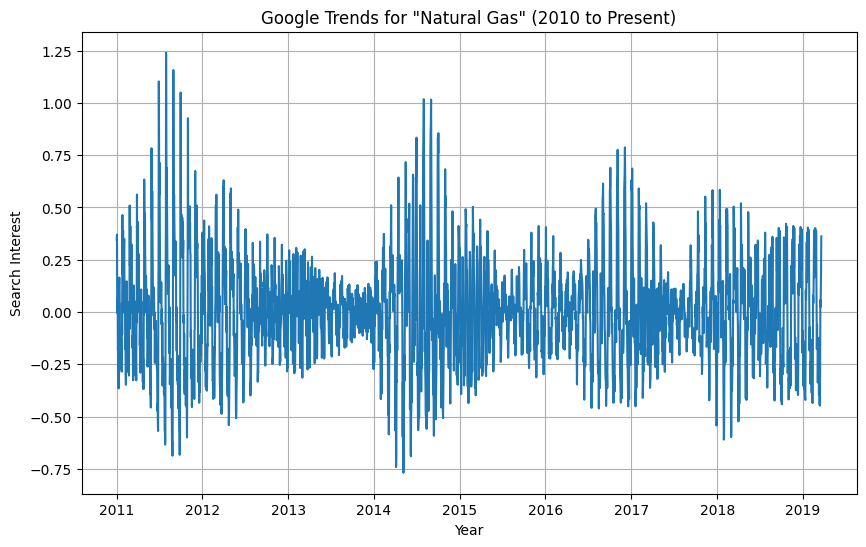

In [39]:

o=[]
for i in range(len(seasonal)):
    o.append(seasonal[i][0])
rt=pd.DataFrame()
rt["Date"]=df["Date"].iloc[0:3000]
rt["Value"]=o
rt["Date"]= pd.to_datetime(rt['Date'])
print(rt)

import matplotlib.pyplot as plt

# Assuming you have the interest_over_time_df DataFrame from the previous code
# Plot the Google Trends data
plt.figure(figsize=(10, 6))
plt.plot(rt["Date"], rt["Value"], linestyle='-')
plt.title('Google Trends for "Natural Gas" (2010 to Present)')
plt.xlabel('Year')
plt.ylabel('Search Interest')
plt.grid(True)
plt.show()